# <font color=green>Day-4</font>

- Our topic of discussion is <font color=green size="4">**Naive Bayes For Classification**</font>
- Dataset That we would be using : iris
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2
- Sections
    0. **Learning Contents about Naive Bayes Classifier**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. Data Encoding
    5. EDA
    6. Data Preparation
    7. Modelling
    8. Model Evaluation
    9. Improving Accuracy using Cross Validation
    10. Model Evaluation - Cross Validated


### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning : Naive Bayes Classifier

- There are few best Video Explanations and blogs about what naive bayes algorithm is and how it can be used for classification. I dont want to replicate the content instead il'l arrange the content in a sequential manner and highight the topics to give attention to in the respective link


1. What is Naive Bayes Algorithm : [Link](https://towardsdatascience.com/the-naive-bayes-classifier-how-it-works-e229e7970b84) 
2. Types of Naive Bayes Classifiers and how to use them : [Link](https://scikit-learn.org/stable/modules/naive_bayes.html)
3. Hands on Working with Naive Bayes : 
<video controls src="./Data/Naive Bayes Handson.mp4" style="width:500px;text-align: center;margin-left:200px;display:block;" />
4. Hands on Working with Multinomial Naive Bayes :
<video controls src="./Data/Multinomial Naive Bayes.mp4" style="width:500px;text-align: center;margin-left:200px;display:block;" />

5. Advantages and Disadvantages
    - Pros
        - Extremely Fast
        - Each Distribution can be independently estimated as 1D vector
        - No problem with Dimentionality
    - Cons
        - Naive Bayes Assumes that features are independent with each other. Which is very rare
        - Decent Classifier but Bad Estimator

6. **Some Good Projects**
    - Spam Detection

## 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders
from sklearn.preprocessing import LabelEncoder

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Cross Validation Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score

## 2. Importing Data


In [2]:
df = pd.read_csv("./Dataset/Classification/Iris.csv")
print("The dataset has {0} rows and {1} features".format(len(df),len(df.columns)))
df.head(5)

The dataset has 150 rows and 6 features


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### <font color=green>Inferences</font>
- We have 150 rows and 6 features
- Our Target Feature is "Species"
- Our Target Variable is in Categorical Format. We need to Enocode it appropriately

## 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### <font color=green>Inferences</font>
- There are lot many unique values in each feature
- We need to apply Gaussian Naive bayes assuming the data is almost like continuos
- There are 3 types of Species in our target varible
- The values of "Species" are categorical values which we have to encode in further steps

## 4. Data Encoding

In [7]:
label_encoder  = LabelEncoder()
data = label_encoder.fit_transform(df["Species"])

# Tranformed Data
df_transformed = df.drop(["Species"],axis=1)
df_transformed["Species"] = data

## 5. EDA

In [8]:
df_transformed.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

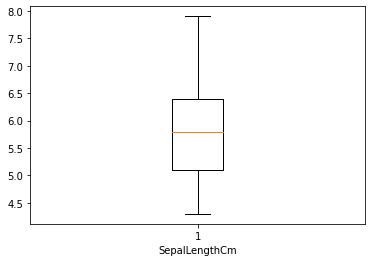

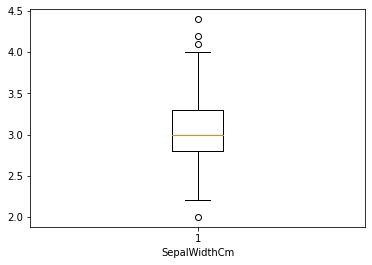

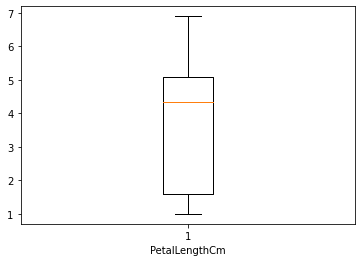

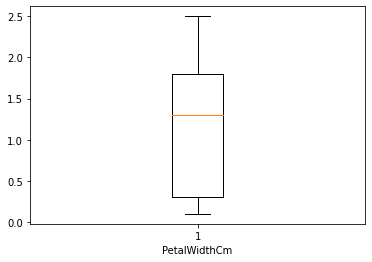

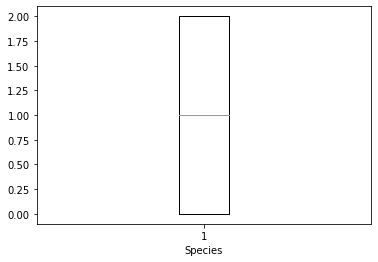

In [9]:
# Box plots for finding Outliers
for field in df_transformed.columns:
    plt.figure()
    plt.boxplot(df_transformed[field])
    plt.xlabel(field)

### <font color=green>Inferences</font>
- Box plots shows that there are Few outliers in "SepalWidthCm" but they seem to not that significant 

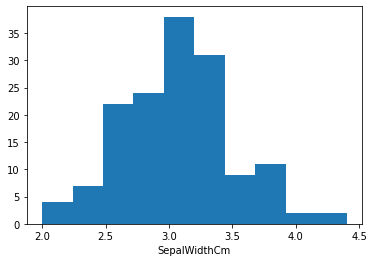

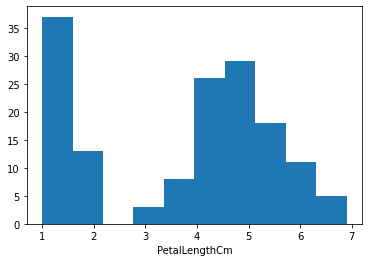

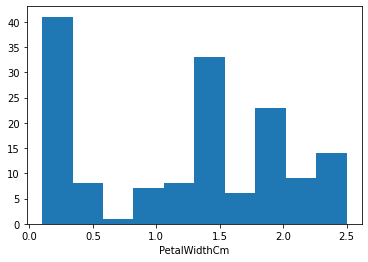

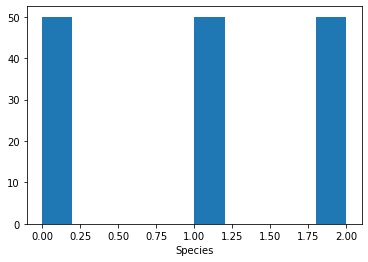

In [10]:
for field in df_transformed.columns:
    plt.figure()
    plt.hist(df_transformed[field])
    plt.xlabel(field)
    plt.show()

### <font color=green>Inferences</font>
- All features are balanced except for class feature.
- It's important to take a bananced sample input for training purposed and not a biased one

<AxesSubplot:>

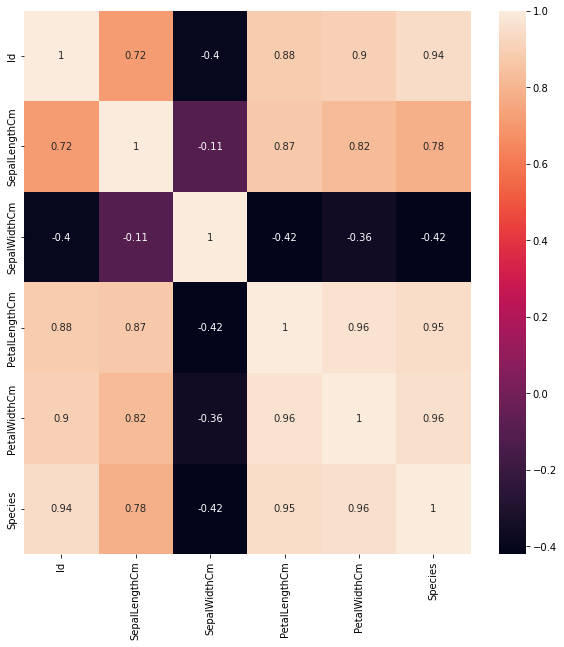

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_transformed.corr(),annot=True)

### <font color=green>Inferences</font>
- Few of the features like "PetallengthCm" and "PetalWidthCm" are highly correalted
- For implemtation purposes lets leave this fact and implement Guassian Naive Bayes Algorithm

## 6. Data Preparation

In [12]:
# Data Preparation
X = df_transformed.drop("Species", axis = 1)
Y = df_transformed["Species"]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.33, random_state = 42, stratify=Y)
# Note : We have used startify inorder to avoid bais between traiing set and testing set distribution
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(150, 5) (150,) (100, 5) (50, 5) (100,) (50,)


## 7. Modelling

In [13]:
model= GaussianNB()
model.fit(train_x,train_y)

GaussianNB()

## 8. Model Evaluation

In [14]:
pred_test = model.predict(test_x)
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Testing-set accuracy score: 0.9800


from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

## 9. Improving Model using Cross Validation

In [15]:
num_folds = 10
subset_size = len(train_x)//num_folds
for i in range(num_folds):
    testing_this_round = train_x[i*subset_size:][:subset_size]
    training_this_round = train_x[:i*subset_size] + train_x[(i+1)*subset_size:]

## 10. Model Evaluation

In [16]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.990


### <font color=green>Inferences</font>
- Accuracy has been Further improved using K-Fold Cross Validation

### <font color=green>Conclusion</font>
- Naive Bayes Classifier has been successfully applied on iris dataset
- NoteWorthy Results
    - Accuracy of Normal Gaussian Naive Bayes algorithm : 0.9800
    - Accuracy after using K-Fold Cross Validation : **0.990**
    

<img src="./Data/thank.jpg"/>
---------------------------------------------------------------------------------------- END OF NOTEBOOK -------------------------------------------------------------------------------------